In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from tabulate import tabulate

In [117]:
data = pd.read_csv("/content/Sales .csv")

In [118]:
data.shape

(9800, 18)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [120]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [152]:
df = data.dropna()

In [153]:
df.shape

(9789, 18)

Data Analysis

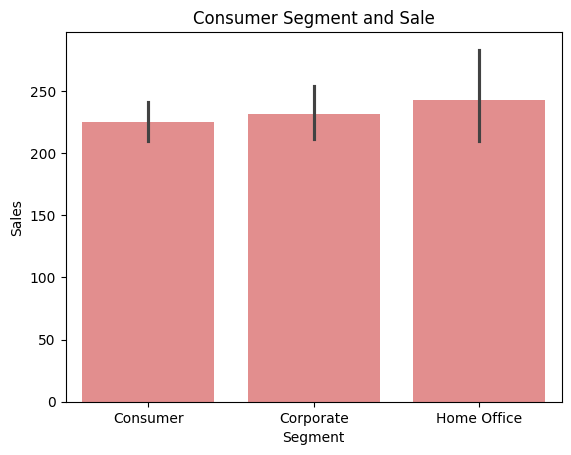

In [154]:
plt.title("Consumer Segment and Sale")
ax = sns.barplot(data=df, x="Segment", y= "Sales", color="#F08080")
plt.show()

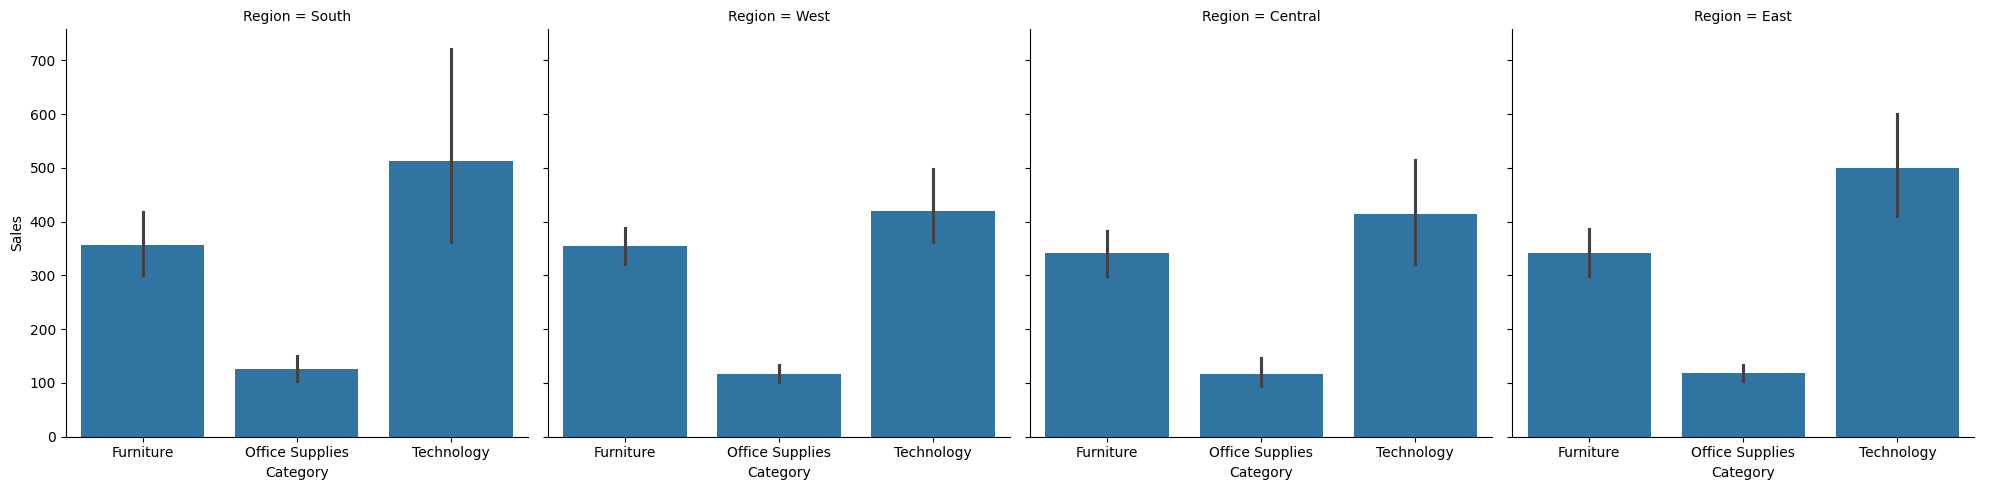

In [155]:
sns.catplot(x="Category", y="Sales", data=df, col="Region", kind="bar")

In [156]:
City_Sales = df.groupby("City")["Sales"].sum().reset_index()
print(tabulate(City_Sales, headers='keys', tablefmt='grid'))

+-----+-------------------+------------+
|     | City              |      Sales |
+=====+===================+============+
|   0 | Aberdeen          |     25.5   |
+-----+-------------------+------------+
|   1 | Abilene           |      1.392 |
+-----+-------------------+------------+
|   2 | Akron             |   2724.24  |
+-----+-------------------+------------+
|   3 | Albuquerque       |   2220.16  |
+-----+-------------------+------------+
|   4 | Alexandria        |   5519.57  |
+-----+-------------------+------------+
|   5 | Allen             |    290.206 |
+-----+-------------------+------------+
|   6 | Allentown         |    853.252 |
+-----+-------------------+------------+
|   7 | Altoona           |     20.451 |
+-----+-------------------+------------+
|   8 | Amarillo          |   3773.06  |
+-----+-------------------+------------+
|   9 | Anaheim           |   5600.55  |
+-----+-------------------+------------+
|  10 | Andover           |    435.85  |
+-----+---------

In [157]:
Category_Sales = df.groupby("Sub-Category")["Sales"].sum().reset_index()
print(tabulate(Category_Sales, headers='keys', tablefmt='grid'))

+----+----------------+-----------+
|    | Sub-Category   |     Sales |
+====+================+===========+
|  0 | Accessories    | 163882    |
+----+----------------+-----------+
|  1 | Appliances     | 104075    |
+----+----------------+-----------+
|  2 | Art            |  26697.4  |
+----+----------------+-----------+
|  3 | Binders        | 200029    |
+----+----------------+-----------+
|  4 | Bookcases      | 109408    |
+----+----------------+-----------+
|  5 | Chairs         | 322108    |
+----+----------------+-----------+
|  6 | Copiers        | 146248    |
+----+----------------+-----------+
|  7 | Envelopes      |  16126    |
+----+----------------+-----------+
|  8 | Fasteners      |   3001.96 |
+----+----------------+-----------+
|  9 | Furnishings    |  89212    |
+----+----------------+-----------+
| 10 | Labels         |  12347.7  |
+----+----------------+-----------+
| 11 | Machines       | 189239    |
+----+----------------+-----------+
| 12 | Paper          |  767

Label Encoder

In [158]:
encoder= LabelEncoder()
df.loc[:,"Order ID"]= encoder.fit_transform(df["Order ID"])
df.loc[:,"Order Date"]= encoder.fit_transform(df["Order Date"])
df.loc[:,"Ship Date"]= encoder.fit_transform(df["Ship Date"])
df.loc[:,"Ship Mode"]= encoder.fit_transform(df["Ship Mode"])
df.loc[:,"Customer ID"]= encoder.fit_transform(df["Customer ID"])
df.loc[:,"Customer Name"]= encoder.fit_transform(df["Customer Name"])
df.loc[:,"Segment"]= encoder.fit_transform(df["Segment"])
df.loc[:,"Country"]= encoder.fit_transform(df["Country"])
df.loc[:,"City"]= encoder.fit_transform(df["City"])
df.loc[:,"State"]= encoder.fit_transform(df["State"])
df.loc[:,"Postal Code"]= encoder.fit_transform(df["Postal Code"])
df.loc[:,"Region"]= encoder.fit_transform(df["Region"])
df.loc[:,"Product ID"]= encoder.fit_transform(df["Product ID"])
df.loc[:,"Category"]= encoder.fit_transform(df["Category"])
df.loc[:,"Sub-Category"]= encoder.fit_transform(df["Sub-Category"])
df.loc[:,"Product Name"]= encoder.fit_transform(df["Product Name"])

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

In [160]:
df= df.astype("int64")

Training of Data

In [161]:
x = df.drop(["Sales"], axis=1 )
y = df["Sales"]


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)


(9789, 17) (7831, 17) (1958, 17)


In [163]:
print(y.shape, y_train.shape, y_test.shape)

(9789,) (7831,) (1958,)


Model Selection and Training

In [164]:
model= XGBRegressor()


In [165]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [166]:
training_prediction = model.predict(x_train)

In [167]:
R2_train = metrics.r2_score(y_train, training_prediction)

In [173]:
print("R2 Score :", R2_train)

R2 Score : 0.9595732635931493


Prediction on test Data

In [174]:
model.fit(x_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [177]:
training_test_data= model.predict(x_test)
R2_test = metrics.r2_score(y_test, training_test_data)

In [178]:
print("Test R2 score: ", R2_test)

Test R2 score:  0.9954946822687649
